# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Finding** 


### Goals 

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
2. Apply a distortion correction to raw images.
3. Use color transforms, gradients, etc., to create a thresholded binary image.
4. Apply a perspective transform to rectify binary image ("birds-eye view").
5. Detect lane pixels and fit to find the lane boundary.
6. Determine the curvature of the lane and vehicle position with respect to center.
7. Warp the detected lane boundaries back onto the original image.
8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


### Step-by-Step Examples


<figure>
 <img src="examples/undistort_output.png" width="60%" alt="Distortion Correction" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Distortion Correction </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/binary_combo_example.jpg" width="60%" alt="Binary Combo" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Edge Detection </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/warped_straight_lines.jpg" width="60%" alt="Perspective Transform" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Perspective Transform </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/color_fit_lines.jpg" width="60%" alt="Lane Fitting" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Lane Fitting </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/example_output.jpg" width="60%" alt="Expected Output" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Expected Output </p> 
 </figcaption>
</figure>
 <p></p> 



## IPython Notebook Configuration

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## 1. Camera calibration using chessboard images

In [2]:
from main import RunCalibration

camera = RunCalibration()


Camera Calibration
----------------------------------------
> Loading data from pickle file: pickle/calibration.p
 - ok



## 2. Distortion Correction

Camera Calibration
----------------------------------------
> Loading data from pickle file: pickle/calibration.p
 - ok

> Correct Distortion on sample images
 - file: camera_cal/calibration1.jpg
 - file: camera_cal/calibration2.jpg
 - file: camera_cal/calibration3.jpg
 - file: camera_cal/calibration4.jpg


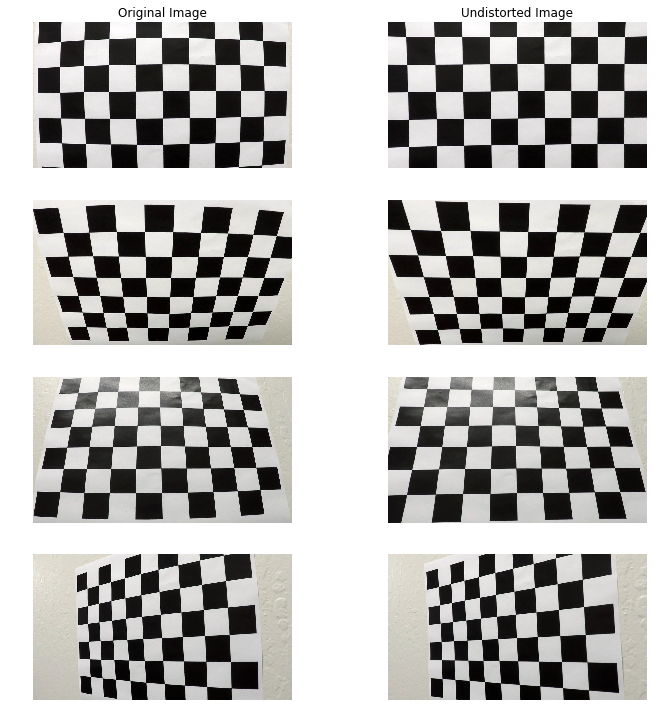

 - ok



In [43]:
from main import RunCalibration, RunDistortionCorrectionExample

camera = RunCalibration()
RunDistortionCorrectionExample(camera)
